<a href="https://colab.research.google.com/github/JAYANTHNITW/Graph_Neural_Networks/blob/main/GNNS_Introduction_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Step 1: Install PyTorch and NetworkX

In [ ]:
# pip install torch
# pip install networkx

##Step 2: Import Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import networkx as nx
import matplotlib.pyplot as plt

##Step 3: Define a Simple Graph

In [ ]:
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 3)])

In [ ]:
# Create a graph
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 3)])

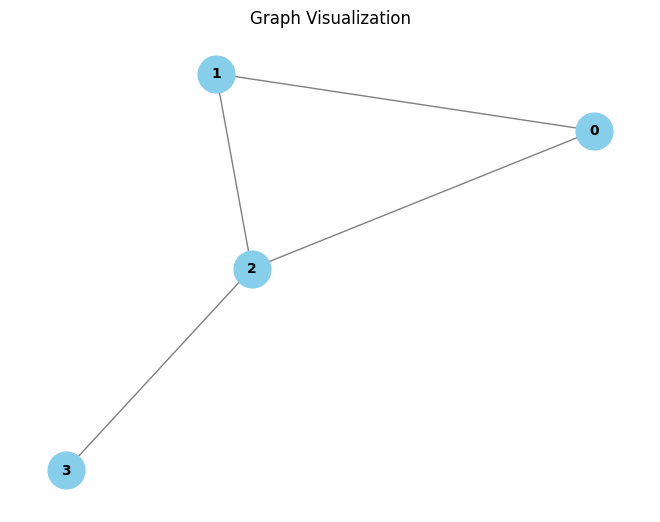

In [ ]:
pos = nx.spring_layout(G)  # Define a layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", edge_color="gray")
plt.title("Graph Visualization")
plt.show()

##Step 4: Convert the Graph to PyTorch Tensors

In [ ]:
edges = torch.tensor(list(G.edges()), dtype=torch.long).t().contiguous()
edge_index = torch.cat([edges, edges.flip(0)], dim=1)

'''
The transpose of the tensor [[0, 1, 2, 3], [0, 2, 2, 3]]
should be [[0, 0, 1, 2], [1, 2, 2, 3]]

The use of dtype=torch.long ensures that the tensor created
to represent the edges of the graph uses 64-bit integers to store the node indices.

This part ensures that the tensor is stored in contiguous memory.
In PyTorch, some operations require tensors to be contiguous for efficient computation.
The contiguous() method ensures that the memory layout is contiguous.

'''

In [ ]:
edges

tensor([[0, 0, 1, 2],
        [1, 2, 2, 3]])

In [ ]:
edge_index

tensor([[0, 0, 1, 2, 1, 2, 2, 3],
        [1, 2, 2, 3, 0, 0, 1, 2]])

In [ ]:
list(G.edges())

[(0, 1), (0, 2), (1, 2), (2, 3)]

## Step 5: Define a Graph Convolutional Layer

In [ ]:
class GraphConvolution(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GraphConvolution, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x, edge_index):
        return self.linear(x)


'''
In the context of super(GraphConvolution, self).__init__(),
it means "call the constructor (__init__) of the superclass (nn.Module)
for the instance self of the subclass (GraphConvolution)".


'''

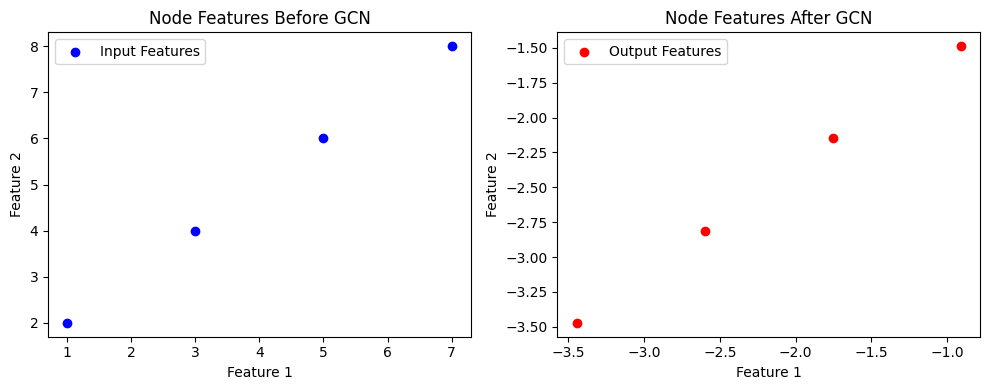

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class GraphConvolution(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GraphConvolution, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x, edge_index):
        return self.linear(x)

# Create a simple graph with 4 nodes and 2 features per node
x = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0], [7.0, 8.0]], requires_grad=True)
edge_index = torch.tensor([[0, 1, 1, 2, 2, 3], [1, 0, 2, 1, 3, 2]], dtype=torch.long)

# Initialize GCN layer
gcn_layer = GraphConvolution(input_dim=2, output_dim=3)

# Apply GCN layer
output = gcn_layer(x, edge_index)

# Plot the node features before and after the GCN layer
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(x[:, 0].detach().numpy(), x[:, 1].detach().numpy(), color='blue', label='Input Features')
plt.title('Node Features Before GCN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(output[:, 0].detach().numpy(), output[:, 1].detach().numpy(), color='red', label='Output Features')
plt.title('Node Features After GCN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


##Step 6: Build a GCN Model
###Build a simple GCN model using multiple graph convolution layers:

In [ ]:
hidden_dim = 5
output_dim =2
class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GraphConvolution(G.number_of_nodes(), hidden_dim)
        self.conv2 = GraphConvolution(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x


##Step 7: Train the Model
###Train the GCN model with a simple dataset:

In [ ]:
num_epochs = 2
input_dim = G.number_of_nodes()
# Assuming you have a feature matrix 'x' with the correct dimensions
x = torch.randn(G.number_of_nodes(), input_dim)  # Adjusted input dimension
model = GCN(G.number_of_nodes(), hidden_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = model(x, edge_index)

    # Define your loss function (e.g., cross-entropy for node classification)
    criterion = nn.CrossEntropyLoss()  # Example loss function
    loss = criterion(output, y)  # Assuming 'y' contains ground truth labels

    loss.backward()
    optimizer.step()

# Your trained GCN model is now ready to use!

NameError: name 'y' is not defined

# Node Classification using Planetiod dataset

In [ ]:
pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.7 MB/s eta 0:00:00


In [ ]:
import torch
from torch_geometric.datasets import Planetoid
import torch_geometric.transforms as T
from torch_geometric.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.nn import GCNConv
# Load the Cora dataset (replace with other datasets like Citeseer or Pubmed if needed)
dataset = Planetoid(root='.', name='Cora', transform=T.NormalizeFeatures())
data = dataset[0]
print(data)


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [ ]:
print(dataset[0])

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [ ]:
data.edge_index

tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])

In [ ]:
# Define a simple Graph Convolutional Network (GCN) model
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

'''
in_channels: are nothing but  input_node_features
hidden_channels: In essence, hidden channels provide a crucial mechanism for nodes to "think" about their neighbors
and incorporate their insights, leading to better node classification in graph neural networks.
out_channels in the final layer represents the number of classes in the node classification task.
'''

'\nin_channels: are nothing but  input_node_features\nhidden_channels: In essence, hidden channels provide a crucial mechanism for nodes to "think" about their neighbors \nand incorporate their insights, leading to better node classification in graph neural networks.\nout_channels in the final layer represents the number of classes in the node classification task.\n'

In [ ]:
dataset.num_node_features

1433

In [ ]:
dataset.num_classes

7

In [ ]:
data.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
data.edge_index

tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])

In [ ]:
data.y[data.train_mask]

tensor([3, 4, 4, 0, 3, 2, 0, 3, 3, 2, 0, 0, 4, 3, 3, 3, 2, 3, 1, 3, 5, 3, 4, 6,
        3, 3, 6, 3, 2, 4, 3, 6, 0, 4, 2, 0, 1, 5, 4, 4, 3, 6, 6, 4, 3, 3, 2, 5,
        3, 4, 5, 3, 0, 2, 1, 4, 6, 3, 2, 2, 0, 0, 0, 4, 2, 0, 4, 5, 2, 6, 5, 2,
        2, 2, 0, 4, 5, 6, 4, 0, 0, 0, 4, 2, 4, 1, 4, 6, 0, 4, 2, 4, 6, 6, 0, 0,
        6, 5, 0, 6, 0, 2, 1, 1, 1, 2, 6, 5, 6, 1, 2, 2, 1, 5, 5, 5, 6, 5, 6, 5,
        5, 1, 6, 6, 1, 5, 1, 6, 5, 5, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
data.train_mask

tensor([ True,  True,  True,  ..., False, False, False])

In [ ]:
'''
  In essence, the train_mask enforces a clear separation between training,
  validation, and test sets, ensuring accurate model evaluation and
  preventing unintended information leakage. It's a crucial safeguard
  for maintaining the integrity of the training process in graph neural networks.'''

"\n  In essence, the train_mask enforces a clear separation between training, \n  validation, and test sets, ensuring accurate model evaluation and \n  preventing unintended information leakage. It's a crucial safeguard \n  for maintaining the integrity of the training process in graph neural networks."

In [ ]:

# Instantiate the model, loss function, and optimizer
model = GCN(dataset.num_node_features, 16, dataset.num_classes)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Training loop
def train():

    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

# Evaluation function
def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    correct = pred[data.test_mask] == data.y[data.test_mask]
    accuracy = correct.sum().item() / data.test_mask.sum().item()
    return accuracy

# Training and evaluation loop
for epoch in range(200):
    train()
    acc = test()
    print(f'Epoch: {epoch + 1}, Test Accuracy: {acc:.4f}')

Epoch: 1, Test Accuracy: 0.3140
Epoch: 2, Test Accuracy: 0.5390


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/df_all.csv")
df.head()

,User_id,tweet,pwords,adj,nadj,question,orginal,pemoji,nemoji,nwords,...,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,labels
0,CSEA11,Just wrapped up my exams and I m feeling accom...,3,1,0,1,1,0,0,3,...,0,0,0,0,0,0,0,0,0,1
1,CSEA12,Finally the holidays are here Time to unwind r...,1,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,CSEA14,Feeling really disappointed and frustrated aft...,1,0,4,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,CSEA15,Struggling to feel the holiday spirit this yea...,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CSEA21,Just had a Python coding marathon and I m on c...,3,5,0,1,1,0,0,3,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(1069, 29)

In [ ]:
relevant_columns = [col for col in df.columns if col not in ["tweet", "User_id"]]
x = df[relevant_columns]  # Feature matrix

# Print the shape of the feature matrix to verify
print(x.shape)

(1069, 27)


In [ ]:
# Extract labels as a NumPy array
labels_array = x["labels"].to_numpy()

# Remove the "labels" column from X
x = x.drop("labels", axis=1)

In [ ]:
print(x.shape)

(1069, 26)


In [ ]:
node_features_numpy = x.to_numpy()
print((node_features_numpy))

[[3 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]


In [ ]:
node_features_numpy.shape[0]

1069

In [ ]:
from sklearn.neighbors import kneighbors_graph

# Assuming X is your feature matrix
edge_index = kneighbors_graph(x, n_neighbors=5, mode='connectivity').nonzero()
edge_index = torch.tensor(edge_index, dtype=torch.long)

<ipython-input-55-eceb0de7f95e>:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  edge_index = torch.tensor(edge_index, dtype=torch.long)


In [ ]:
print(edge_index)

tensor([[   0,    0,    0,  ..., 1068, 1068, 1068],
        [ 374,  957,  225,  ...,  712,  716,   80]])


In [ ]:
print(edge_index.shape)


torch.Size([2, 5345])


In [ ]:
import numpy as np

total_nodes = 1069

train_size = int(0.6 * total_nodes)
val_size = int(0.2 * total_nodes)
test_size = total_nodes - train_size - val_size

# Create boolean masks
train_mask = np.full(total_nodes, False)
train_mask[:train_size] = True

val_mask = np.full(total_nodes, False)
val_mask[train_size:train_size + val_size] = True

test_mask = np.full(total_nodes, False)
test_mask[train_size + val_size:] = True

# Print mask sizes for verification
print(f"Train mask size: {train_mask.sum()}")
print(f"Validation mask size: {val_mask.sum()}")
print(f"Test mask size: {test_mask.sum()}")


Train mask size: 641
Validation mask size: 213
Test mask size: 215


In [ ]:
from torch_geometric.data import Data
data = Data(
    x=torch.from_numpy(node_features_numpy),
    edge_index=torch.tensor(edge_index, dtype=torch.long),
    y=torch.from_numpy(labels_array),
    train_mask=torch.tensor(train_mask, dtype=torch.bool),
    val_mask=torch.tensor(val_mask, dtype=torch.bool),
    test_mask=torch.tensor(test_mask, dtype=torch.bool)
)

<ipython-input-104-1846bf6ddec6>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index=torch.tensor(edge_index, dtype=torch.long),


In [ ]:
data

Data(x=[1069, 26], edge_index=[2, 5345], y=[1069], train_mask=[1069], val_mask=[1069], test_mask=[1069])

In [ ]:
data.y

tensor([1, 1, 0,  ..., 1, 1, 0])

In [ ]:
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [ ]:
def custom_gcn_norm(edge_index, edge_weight, num_nodes, improved=False, add_self_loops=False, dtype=None):
    # ... (copy relevant code from gcn_norm, adding conversions)
    deg = scatter(edge_weight, idx, dim=0, dim_size=num_nodes, reduce='sum')
    deg = deg.float()  # Ensure float data type
    # ... (rest of the normalization logic)
    return edge_weight


In [ ]:
class CustomGCNConv(GCNConv):
    def forward(self, x, edge_index):
        # ... (original forward logic, adding conversions)
        edge_weight = self.gcn_norm(edge_index, edge_weight, x.size(0))
        edge_weight = edge_weight.float()  # Ensure float data type
        # ... (rest of the forward logic)
        return x


In [ ]:
def gcn_norm_wrapper(edge_index, edge_weight, *args, **kwargs):
    edge_weight = edge_weight.float()  # Ensure float data type
    return gcn_norm(edge_index, edge_weight, *args, **kwargs)


In [ ]:
data.num_node_features

26

In [ ]:
data.x

tensor([[3, 1, 0,  ..., 0, 0, 0],
        [1, 0, 1,  ..., 0, 0, 0],
        [1, 0, 4,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 0, 0, 0]])

In [ ]:
modified_x = torch.where(data.x >= 2, torch.ones_like(data.x), data.x)

In [ ]:
modified_x

tensor([[1, 1, 0,  ..., 0, 0, 0],
        [1, 0, 1,  ..., 0, 0, 0],
        [1, 0, 1,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 1, 0,  ..., 0, 0, 0]])

In [ ]:
data.edge_index

tensor([[   0,    0,    0,  ..., 1068, 1068, 1068],
        [ 374,  957,  225,  ...,  712,  716,   80]])

In [ ]:
data.y[data.test_mask]

tensor([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
# Instantiate the model, loss function, and optimizer
model = GCN(data.num_node_features, 16, 2)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Training loop
def train():
    model.train()
    optimizer.zero_grad()
    #edge_index = data.edge_index.to(torch.float)
 #   idx = idx.long()  # Ensure int64 data type
    out = model(modified_x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

# Evaluation function
def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    correct = pred[data.test_mask] == data.y[data.test_mask]
    accuracy = correct.sum().item() / data.test_mask.sum().item()
    return accuracy

# Training and evaluation loop
for epoch in range(2):
    train()
    acc = test()
    print(f'Epoch: {epoch + 1}, Test Accuracy: {acc:.4f}')

RuntimeError: Found dtype Long but expected Float

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class CustomGCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)  # Optional dropout
        x = self.conv2(x, edge_index)
        return x


In [ ]:
data.y

tensor([1, 1, 0,  ..., 1, 1, 0])

In [ ]:
model = CustomGCN(data.num_features, 16, 2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()  # Adjust loss for multi-class or other tasks

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    test_correct = pred[data.test_mask] == data.y[data.test_mask]
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
    return test_acc

# Training and evaluation loop
for epoch in range(200):
    train()
    train_acc = test()
    print(f'Epoch: {epoch+1:03d}, Train Acc: {train_acc:.4f}')


RuntimeError: Found dtype Long but expected Float